# 训练

In [8]:
# # 训练
# setsid python 3rdparty/mmdetection/tools/train.py cfg/faster_rcnn_lard.py > train_faster_rcnn.log 2>&1 &

# 日志分析

['lr', 'data_time', 'loss', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls', 'acc', 'loss_bbox', 'time', 'iter', 'memory', 'step']
['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l', 'data_time', 'time']
最大map: (9)0.656


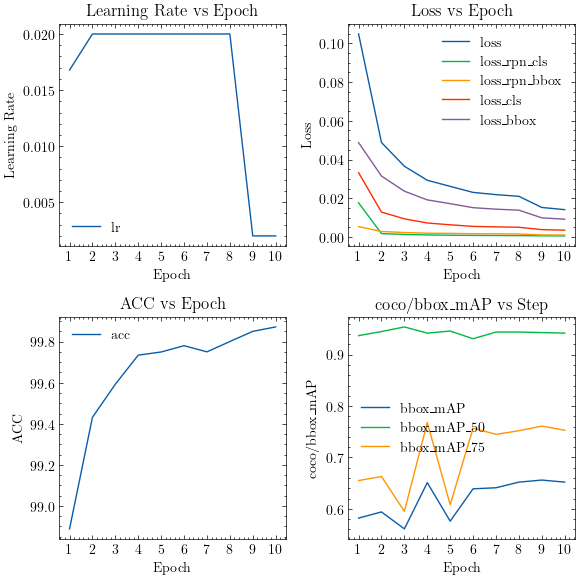

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')


def read_json(file_path) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_train = []
    df_val = []
    with open(file_path, 'r') as f:
        for line in f:
            record = json.loads(line.strip())
            if 'lr' in record:
                df_train.append(record)
            else:
                df_val.append(record)
    df_train = pd.DataFrame(df_train)
    df_val = pd.DataFrame(df_val)
    if len(df_train):
        df_train = df_train.groupby('epoch').mean()
        print(df_train.columns.to_list())
    if len(df_val):
        df_val = df_val.groupby('step').mean()
        print(df_val.columns.to_list())
    return df_train, df_val


def plot_fastern_rcnn(df_train, df_val):
    fig, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=100)
    axs = axs.flatten()
    if len(df_train):
        axs[0].plot(df_train.index, df_train['lr'], label='lr')
        axs[0].legend()
        axs[0].set_title('Learning Rate vs Epoch')
        axs[0].set_xlabel('Epoch')
        axs[0].set_ylabel('Learning Rate')
        axs[0].set_xticks(df_train.index.astype(int).unique())

        axs[1].plot(df_train.index, df_train['loss'], label='loss')
        axs[1].plot(df_train.index, df_train['loss_rpn_cls'],
                    label='loss_rpn_cls')
        axs[1].plot(df_train.index, df_train['loss_rpn_bbox'],
                    label='loss_rpn_bbox')
        axs[1].plot(df_train.index, df_train['loss_cls'], label='loss_cls')
        axs[1].plot(df_train.index, df_train['loss_bbox'], label='loss_bbox')
        axs[1].legend()
        axs[1].set_title('Loss vs Epoch')
        axs[1].set_xlabel('Epoch')
        axs[1].set_ylabel('Loss')
        axs[1].set_xticks(df_train.index.astype(int).unique())

        axs[2].plot(df_train.index, df_train['acc'], label='acc')
        axs[2].legend()
        axs[2].set_title('ACC vs Epoch')
        axs[2].set_xlabel('Epoch')
        axs[2].set_ylabel('ACC')
        axs[2].set_xticks(df_train.index.astype(int).unique())
    if len(df_val):
        axs[3].plot(
            df_val.index,
            df_val['coco/bbox_mAP'],
            label='bbox_mAP')
        axs[3].plot(
            df_val.index,
            df_val['coco/bbox_mAP_50'],
            label='bbox_mAP_50')
        axs[3].plot(
            df_val.index,
            df_val['coco/bbox_mAP_75'],
            label='bbox_mAP_75')
        axs[3].legend()
        axs[3].set_title('coco/bbox_mAP vs Step')
        axs[3].set_xlabel('Epoch')
        axs[3].set_ylabel('coco/bbox_mAP')
        axs[3].set_xticks(df_val.index.astype(int).unique())
    plt.tight_layout()
    plt.show()


# 读取json文件
json_path = 'runs/faster_rcnn/20231019_162604/vis_data/20231019_162604.json'
df_train, df_val = read_json(json_path)

# 绘图
print(
    f"最大map: ({df_val['coco/bbox_mAP'].idxmax()}){df_val['coco/bbox_mAP'].max()}")
plot_fastern_rcnn(df_train, df_val)


# 测试

In [5]:
model_name='faster_rcnn'
best_model_path=f"runs/{model_name}/best_coco_bbox_mAP_epoch_9.pth"
cfg_path=f'cfg/{model_name}_lard.py'

# 测试-synth
! python mmdetection/tools/test.py \
    {cfg_path} \
    {best_model_path} \
    --cfg-options \
    test_evaluator.outfile_prefix=runs/{model_name}/test/coco_detection/prediction_test_synth \
    work_dir=runs/{model_name}/test/

# 测试-nominal
! python mmdetection/tools/test.py \
    {cfg_path} \
    {best_model_path} \
    --cfg-options \
    test_dataloader.dataset.ann_file=annotations/instances_test_real_nominal.json \
    test_dataloader.dataset.data_prefix.img=YoloFormat/test_real_nominal/images/ \
    test_evaluator.ann_file=datasets/lard/annotations/instances_test_real_nominal.json \
    test_evaluator.outfile_prefix=runs/{model_name}/test/coco_detection/prediction_test_real_nominal \
    work_dir=runs/{model_name}/test/

# 测试-edge
! python mmdetection/tools/test.py \
    {cfg_path} \
    {best_model_path} \
    --cfg-options \
    test_dataloader.dataset.ann_file=annotations/instances_test_real_edge.json \
    test_dataloader.dataset.data_prefix.img=YoloFormat/test_real_edge/images/ \
    test_evaluator.ann_file=datasets/lard/annotations/instances_test_real_edge.json \
    test_evaluator.outfile_prefix=runs/{model_name}/test/coco_detection/prediction_test_real_edge \
    work_dir=runs/{model_name}/test/


10/20 17:53:18 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 1383280829
    GPU 0: NVIDIA GeForce GTX 1070
    CUDA_HOME: /usr/local/cuda-11.1
    NVCC: Cuda compilation tools, release 11.1, V11.1.74
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
    PyTorch: 1.10.2+cu111
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50

# 评估

In [1]:
from pycocotools.cocoeval import COCOeval
from pycocotools.coco import COCO

# 保存评价结果
coco_evals = {}
model_name = 'faster_rcnn'

# 在各测试集进行推理
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    print(f'正在评价: {data_type}')
    annotation_file = f'datasets/lard/annotations/instances_{data_type}.json'
    prediction_file = f'runs/{model_name}/test/coco_detection/prediction_{data_type}.bbox.json'

    coco_true = COCO(annotation_file=annotation_file)
    coco_pre = coco_true.loadRes(resFile=prediction_file)

    coco_evaluator = COCOeval(
        cocoGt=coco_true, cocoDt=coco_pre, iouType="bbox")
    coco_evaluator.evaluate()
    coco_evaluator.accumulate()
    coco_evaluator.summarize()

    coco_evals[data_type] = coco_evaluator

正在评价: test_synth
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.46s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.656
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.943
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.761
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.539
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.717
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.706
 Average Recall     (AR) @[ IoU=0.50:0.95 | are

In [2]:
import pandas as pd

metrics = [
    "AP (IoU=0.50:0.95, area=all, maxDets=100)",
    "AP (IoU=0.50, area=all, maxDets=100)",
    "AP (IoU=0.75, area=all, maxDets=100)",
    "AP (IoU=0.50:0.95, area=small, maxDets=100)",
    "AP (IoU=0.50:0.95, area=medium, maxDets=100)",
    "AP (IoU=0.50:0.95, area=large, maxDets=100)",
    "AR (IoU=0.50:0.95, area=all, maxDets=1)",
    "AR (IoU=0.50:0.95, area=all, maxDets=10)",
    "AR (IoU=0.50:0.95, area=all, maxDets=100)",
    "AR (IoU=0.50:0.95, area=small, maxDets=100)",
    "AR (IoU=0.50:0.95, area=medium, maxDets=100)",
    "AR (IoU=0.50:0.95, area=large, maxDets=100)"
]

all_metrics = {}
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:
    cocoEval = coco_evals[data_type]
    all_metrics[data_type] = cocoEval.stats

all_metrics = pd.DataFrame(all_metrics, index=metrics)
display(all_metrics.round(3))

,test_synth,test_real_nominal,test_real_edge
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.656,0.416,0.254
"AP (IoU=0.50, area=all, maxDets=100)",0.943,0.607,0.403
"AP (IoU=0.75, area=all, maxDets=100)",0.761,0.478,0.304
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.021,0.000
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.539,0.251,0.138
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.717,0.668,0.373
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.706,0.446,0.278
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.706,0.448,0.278
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.706,0.448,0.278
"AR (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.017,0.000


# 推理

In [3]:
from mmdet.apis import init_detector, inference_detector
import time
import glob
from tqdm import tqdm
from PIL import Image
from collections import Counter

# 参数定义
model_name = 'faster_rcnn'
best_epoch = 9
best_model_path = f'runs/{model_name}/best_coco_bbox_mAP_epoch_{best_epoch}.pth'
cfg_path = f'cfg/{model_name}_lard.py'

# 初始化模型
model = init_detector(cfg_path, best_model_path, device='cuda:0')

# 存储结果
all_speed = {}

# 在各测试集进行统计
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    # 数据列表
    path = f'datasets/lard/YoloFormat/{data_type}/images/'
    image_paths = glob.glob(f"{path}*")

    # 尺寸统计
    image_dimensions = []
    for image_path in tqdm(image_paths, ncols=100, desc="统计"):
        img = Image.open(image_path)
        image_dimensions.append(img.size)
    dimensions_counter = Counter(image_dimensions)
    print(f"{data_type}: {dimensions_counter}")
    

Loads checkpoint by local backend from path: runs/faster_rcnn/best_coco_bbox_mAP_epoch_9.pth


推理: 100%|█████████████████████████████████████████████████████| 2212/2212 [04:06<00:00,  8.99it/s]


数据集: test_synth {(2448, 2048): 2212}
平均推理时间: 110.74 ms
平均FPS: 9.03


推理: 100%|█████████████████████████████████████████████████████| 1500/1500 [03:21<00:00,  7.43it/s]


数据集: test_real_nominal {(1920, 1080): 628, (3840, 2160): 750, (1902, 1080): 19, (1280, 720): 96, (1918, 1080): 7}
平均推理时间: 134.23 ms
平均FPS: 7.45


推理: 100%|███████████████████████████████████████████████████████| 311/311 [00:37<00:00,  8.34it/s]

数据集: test_real_edge {(3840, 2160): 178, (1920, 1080): 109, (1280, 720): 24}
平均推理时间: 119.57 ms
平均FPS: 8.36


,test_synth,test_real_nominal,test_real_edge
metrics,,,
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.656091,0.416429,0.254411
"AP (IoU=0.50, area=all, maxDets=100)",0.942622,0.606633,0.403403
"AP (IoU=0.75, area=all, maxDets=100)",0.761491,0.477799,0.303573
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000000,0.020792,0.000000
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.539182,0.250812,0.137520
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.716889,0.668402,0.372927
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.706148,0.446400,0.278135
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.706148,0.447733,0.278135
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.706148,0.447733,0.278135


# 测速

In [2]:
# 参数定义
model_name = 'faster_rcnn'
best_epoch = 9
best_model_path = f'runs/{model_name}/best_coco_bbox_mAP_epoch_{best_epoch}.pth'
cfg_path = f'cfg/{model_name}_lard.py'

# 开始测试
! python mmdetection/tools/analysis_tools/benchmark.py \
    {cfg_path} \
    --checkpoint {best_model_path} \
    --task inference \
    --repeat-num 3 \
    --log-interval 100 \
    --num-warmup 100 \
    --dataset-type test


10/21 22:14:06 - mmengine - INFO - before build: 
10/21 22:14:06 - mmengine - INFO - (GB) mem_used: 4.99 | uss: 0.41 | pss: 0.77 | total_proc: 1
Loads checkpoint by local backend from path: runs/faster_rcnn/best_coco_bbox_mAP_epoch_9.pth
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
10/21 22:14:08 - mmengine - INFO - after build: 
10/21 22:14:08 - mmengine - INFO - (GB) mem_used: 6.99 | uss: 2.95 | pss: 3.31 | total_proc: 1
10/21 22:14:17 - mmengine - INFO - ==================================
10/21 22:14:27 - mmengine - INFO - ==================================
10/21 22:14:27 - mmengine - INFO - Done image [200/2000], fps: 18.8 img/s, times per image: 53.3 ms/img, cuda memory: 291 MB
10/21 22:14:27 - mmengine - INFO - (GB) mem_used: 7.02 | uss: 3.00 | pss: 3.37 | total_proc: 1
10/21 22:14:36 - mmengine - INFO - ==================================
10/21 22:14:36 - mmengine - INFO - Done image [300/2000], fps: 18.8 img/s, times per image: 53.2 ms/img, 

In [ ]:
# 保存结果
all_speed = {}

for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    average_time = 100
    fps = 1000/average_time
    
    # 存储结果
    all_speed[data_type] = [average_time, fps]

# 构建dataframe
all_speed = pd.DataFrame(
    data=all_speed,
    index=['Average inference time (ms)', 'FPS']
)

# 合并测试指标
results = pd.concat([all_metrics, all_speed], axis=0)
results.index.name = 'metrics'
results.to_csv(
    f'results/tables/metrics/metrics_{exp_name}.csv', 
    float_format='%.3f')